# Linear Regression of E-commerce Customers (PROJECT)
### By: Ajibade Abdulquddus
<img src='ecommerce.jpg' /></a>


This is a project for an e-commerce company that sells clothing online and also have in-store advice sessions. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The project is to help the company decide whether to focus their efforts on their mobile app experience or their website. 


## Imports
**Importing pandas, numpy, matplotlib,and seaborn.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Getting the Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color avatar. Then it also has a numerical value columns:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes.
* Time on Website: Average time spent on Website in minutes.
* Length of Membership: How many years the customer has been member.

#### Reading in the csv file (as 'customers') and checking the head, info() and describe() methods:

In [3]:
customers= pd.read_csv('Ecommerce Customers')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Exploratory Data Analysis
We'll only be using the numerical data of the csv file.

#### Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns and checking the correlation:

C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


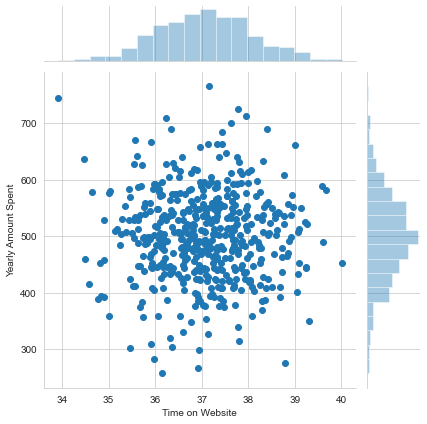

In [7]:
sns.jointplot(data= customers, x='Time on Website', y='Yearly Amount Spent')

#### Doing the same but with the Time on App column instead

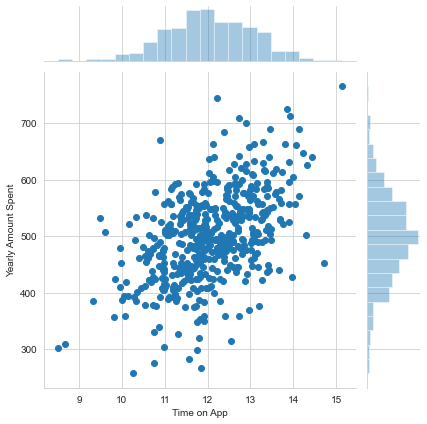

In [8]:
sns.jointplot(data= customers, x='Time on App', y='Yearly Amount Spent')

The above plots show that Time on App has a better correlation to the Yearly amount spent than time on Website, but let's explore more on the data

#### Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

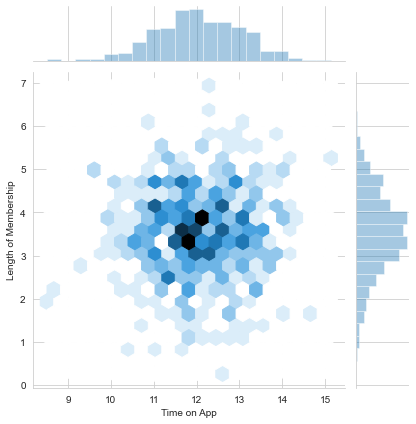

In [25]:
sns.jointplot(data= customers, x='Time on App', y='Length of Membership', kind='hex')

#### Let's explore these types of relationships across the entire data set. Using pairplot:

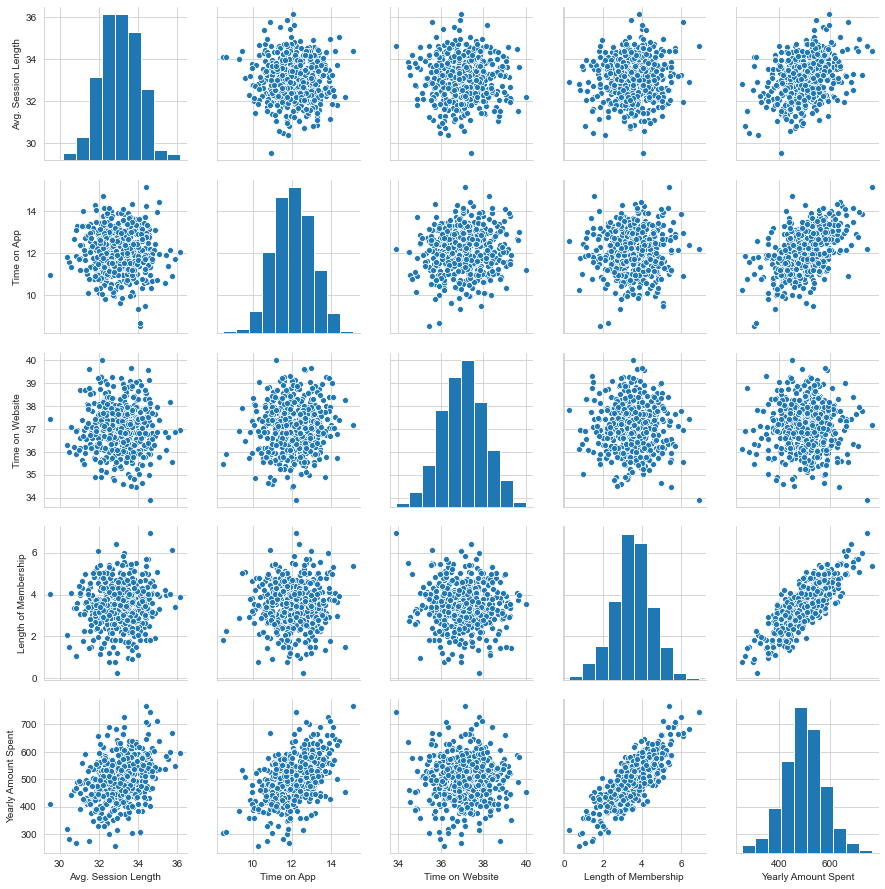

In [26]:
sns.pairplot(customers)

Based off this plot, we can see that the Length of Membership is the most correlated features with Yearly Amount Spent

#### Creating a linear model plot of Yearly Amount Spent vs Length of Membership

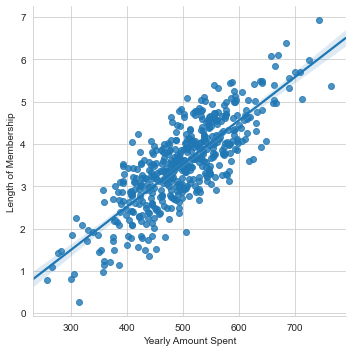

In [39]:
sns.lmplot(data=customers , x='Yearly Amount Spent' ,y= 'Length of Membership',)

### Training and Testing Data

Now that we've explored the data a bit, we'll go ahead and split the data into training and testing sets.


In [9]:
X= customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y= customers['Yearly Amount Spent']

##### Using cross_validation.train_test_split from sklearn to split the data into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

Now it's time to train our model on our training data!
##### Importing LinearRegression from sklearn.linear_model:

In [15]:
from sklearn.linear_model import LinearRegression

##### Creating an instance of a LinearRegression() model named lm.

In [16]:
lm= LinearRegression()

#### Train/fit lm on the training data

In [17]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Printing out the coefficients of the model:

In [18]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Predicting Test Data
Now that we have fit our model, we'll evaluate its performance by predicting off the test values
##### Using lm.predict() to predict off the X_test set of the data.

In [19]:
predictions= lm.predict(X_test)

#### Creating a scatterplot off the real test values versus the predicted values.

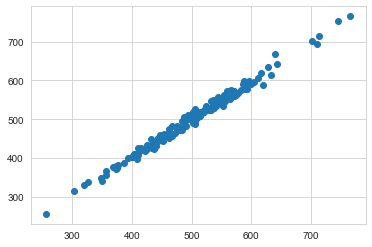

In [92]:
plt.scatter(y_test, predictions)

### Evaluating the Model
We'll evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
#### Calculating the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error:


In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430841
MSE: 79.81305165097469
RMSE: 8.933815066978648


In [21]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

### Residuals
We'll explore the residuals to make sure everything was okay with our data.
#### Plotting a histogram of the residuals, making sure it looks normally distributed: 

C:\Users\Ajisco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<AxesSubplot:xlabel='Yearly Amount Spent'>

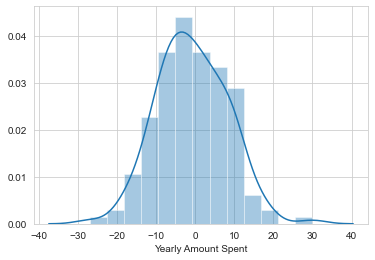

In [22]:
sns.distplot(y_test - predictions)

### Conclusion
We still want to figure out the answer to the original question, do we focus our efffort on mobile app or website development? Or maybe that doesn't even really matter,and Membership Time is what is really important. We'll try to interpret the coefficients all to get an idea.


In [23]:
#coefficients= pd.DataFrame(lm.coef_, index=[X], columns= ['Coefficient'])
#or
coefficients= pd.DataFrame(lm.coef_, X.columns, columns= ['Coefficient'])
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Based on above, the answer can be interpreted in different ways:
#### With Time on Website being the least, it affects the company the least, hence the company can decide to improve on it to have  better results, or
#### With Time on App affecting more or Length of Membership being the most, the company might decide to improve on them for better results.
#### In all, it still depends on many other factors including cost, feasibility and so on.

### The End!


